# Курсовая работа ТМО

# Задание

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

# Ход выполнения курсовой работы

# 1) Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

В качестве набора данных мы будем использовать набор данных по обнаружению сердечного заболевания у пациента.

Файл содержит следующие колонки:
1. age - возраст пациента;
2. sex - пол пациента (1 = мужчина; 0 = женщина);
3. chest pain type (4 values) - тип боли в груди пациента;
4. resting blood pressure - кровяное давление в покое;
5. serum cholestoral in mg/dl - содержание холестирина;
6. fasting blood sugar > 120 mg/dl - уровень сахара в крови натощак;
7. resting electrocardiographic results (values 0,1,2) - результаты электрокардиографии в покое;
8. maximum heart rate achieved - максимальная частота сердечных сокращений;
9. exercise induced angina - стенокардия, вызванная физической нагрузкой;
10. oldpeak = ST depression induced by exercise relative to rest - показание на электрокардиограмме;
11. the slope of the peak exercise ST segment - показание на электрокардиограмме;
12. number of major vessels (0-3) colored by flourosopy - количество крупных сосудов;
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect - анализ из крови;
14. target - наличие или отсутствие сердечного заболевания у пациента.

Будем решать задачу классификации. В качестве целевого признака возьмем колонку target. Поскольку она содержит только значения 0 или 1, то это задача бинарной клиссификации.

#### Импорт необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Устанавливаем тип графиков
sns.set(style="ticks")

# Для лучшего качествоа графиков
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# Устанавливаем ширину экрана для отчета
pd.set_option("display.width", 70)

#### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas

In [2]:
data = pd.read_csv('heart.csv')

# 2) Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [3]:
# Первые пять записей набора данных
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Размер датасета (303 - строки, 14 - колонок)
data.shape

(303, 14)

In [5]:
# Список колонок
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

In [6]:
# Список колонок с типами данных 
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# Проверим наличие пустых значений
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Датасет не содержит пропусков данных

In [8]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['target'].unique()

array([1, 0])

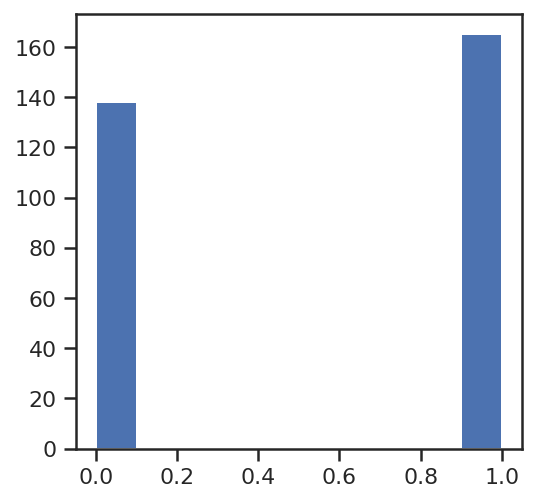

In [9]:
# Оценим дисбаланс классов для Occupancy
fig, ax = plt.subplots(figsize=(4,4)) 
plt.hist(data['target'])
plt.show()

In [10]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_1, class_0 = data['target'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 2)*100, round(class_1 / total, 2)*100))

Класс 0 составляет 46.0%, а класс 1 составляет 54.0%.


Дисбаланс классов практически отсутствует

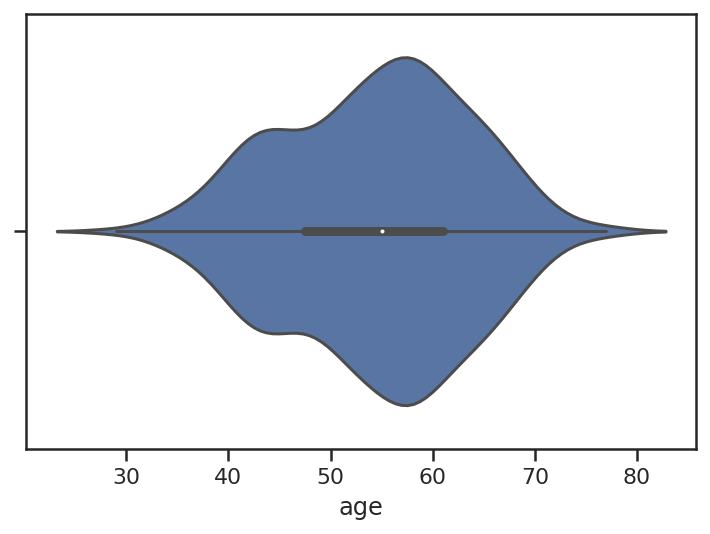

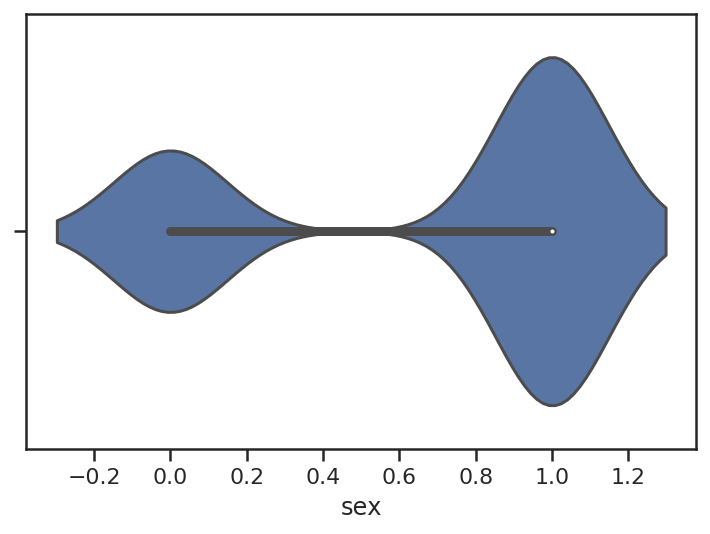

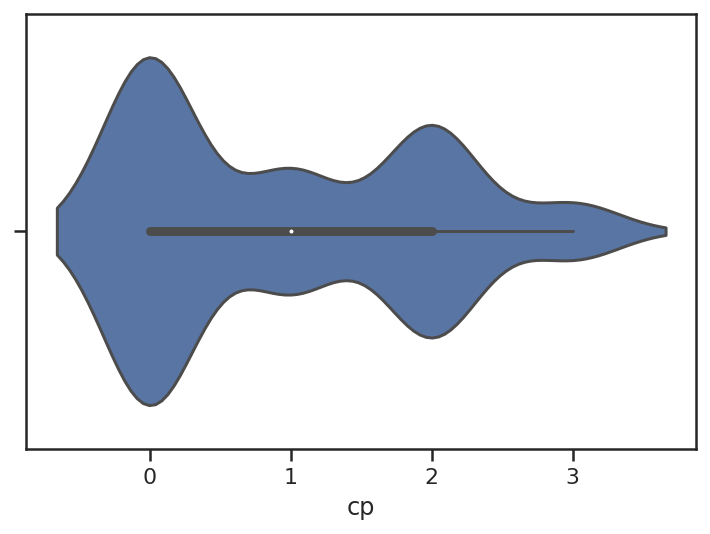

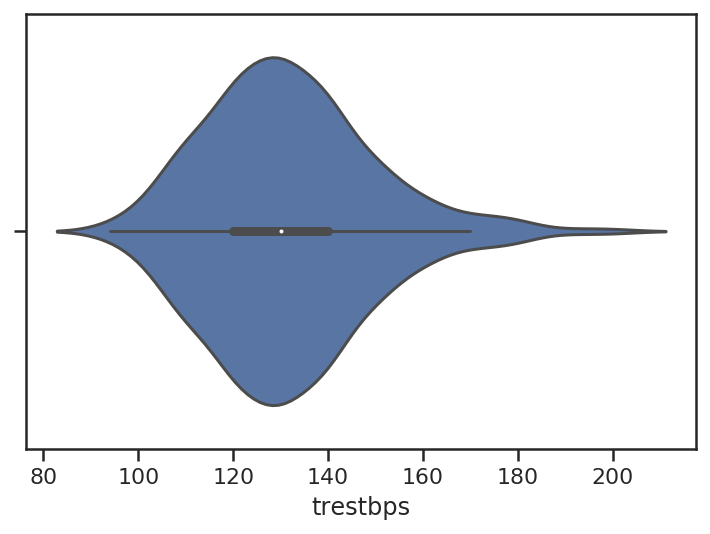

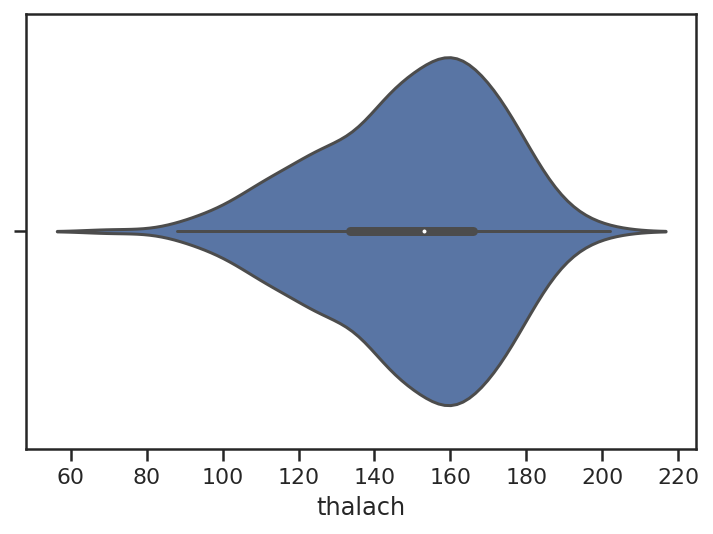

In [12]:
# Скрипичные диаграммы для некоторых колонок колонок
for col in ['age', 'sex', 'cp', 'trestbps', 'thalach']:
    sns.violinplot(x=data[col])
    plt.show()

# 3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

Для построения моделей будем использовать все признаки.

Категориальные признаки отсутствуют, их кодирования не требуется. Исключением является признак target, но в представленном датасете он уже закодирован на основе подхода LabelEncoding.

Вспомогательные признаки для улучшения качества моделей мы строить не будем.

Выполним масштабирование данных.

In [13]:
# Числовые колонки для масштабирования
scale_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [14]:
sc = MinMaxScaler()
sc_data = sc.fit_transform(data[scale_cols])

In [15]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc_data[:,i]

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,trestbps_scaled,chol_scaled,fbs_scaled,restecg_scaled,thalach_scaled,exang_scaled,oldpeak_scaled,slope_scaled,ca_scaled,thal_scaled
0,63,1,3,145,233,1,0,150,0,2.3,...,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,37,1,2,130,250,0,1,187,0,3.5,...,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,41,0,1,130,204,0,0,172,0,1.4,...,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,56,1,1,120,236,0,1,178,0,0.8,...,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,57,0,0,120,354,0,1,163,1,0.6,...,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


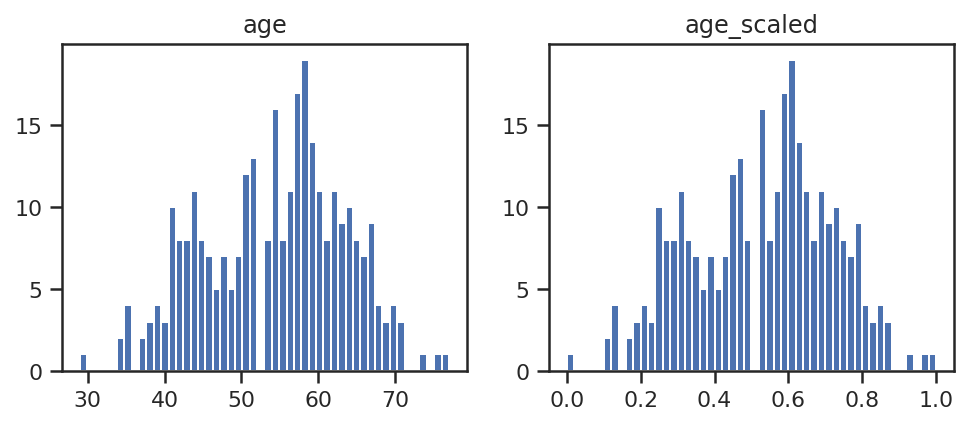

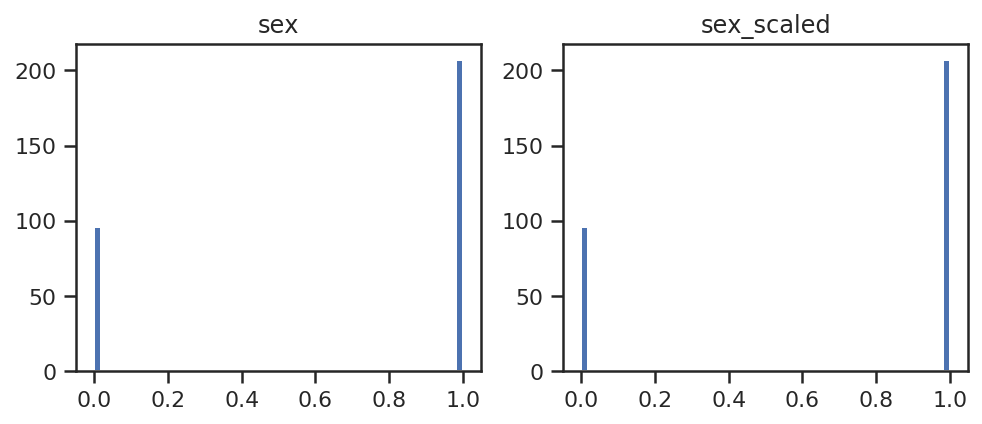

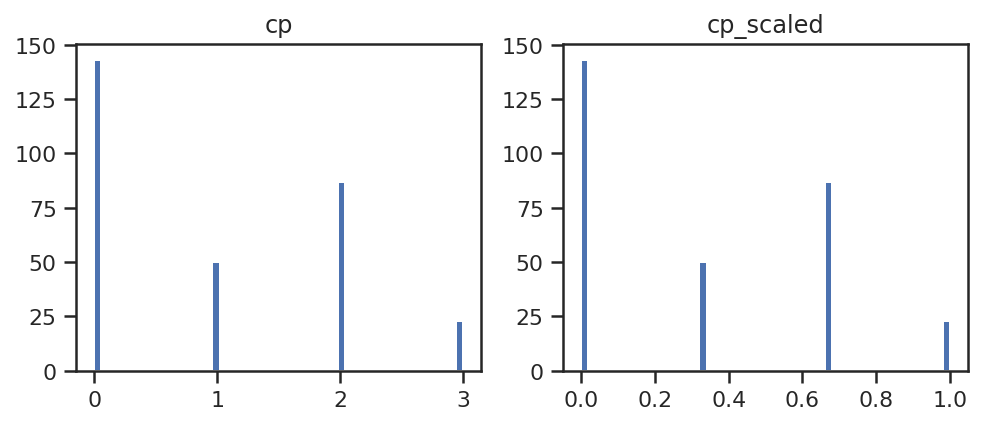

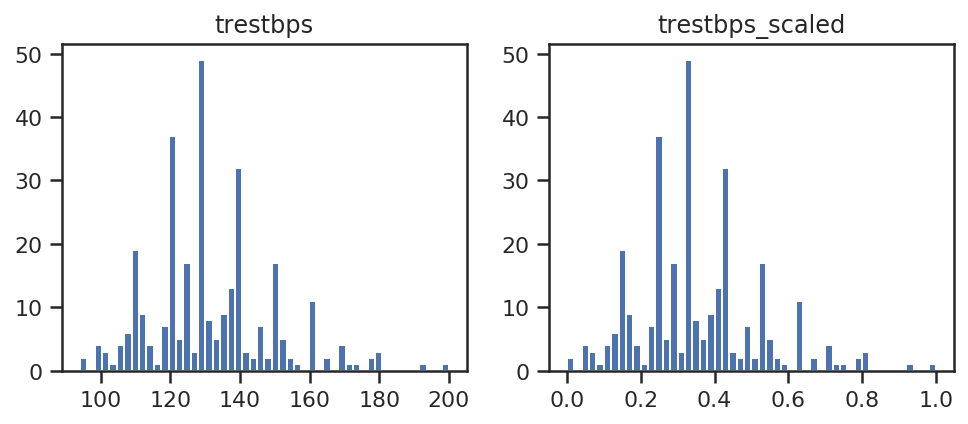

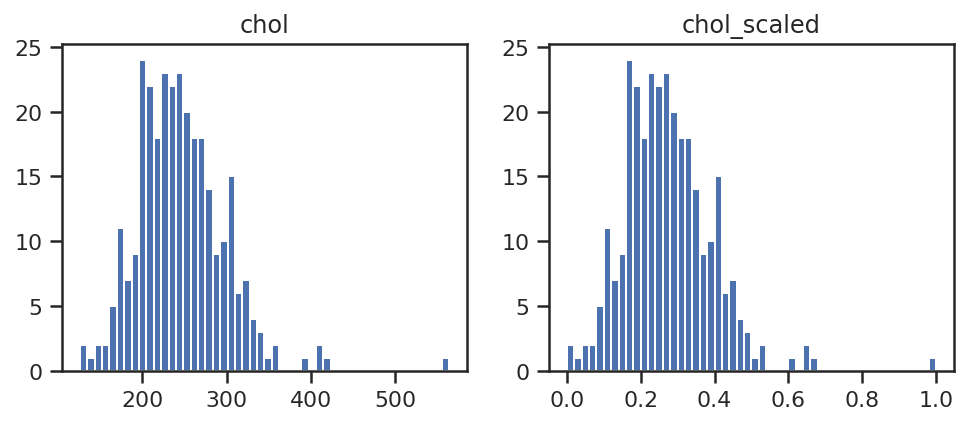

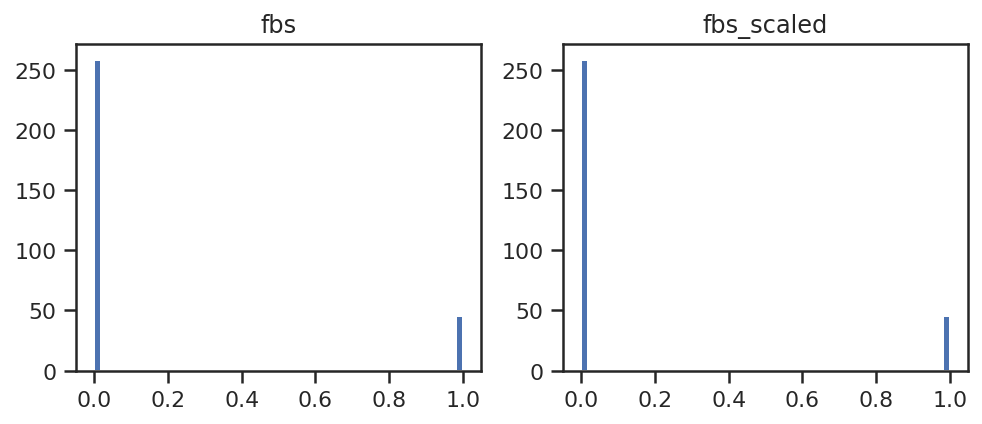

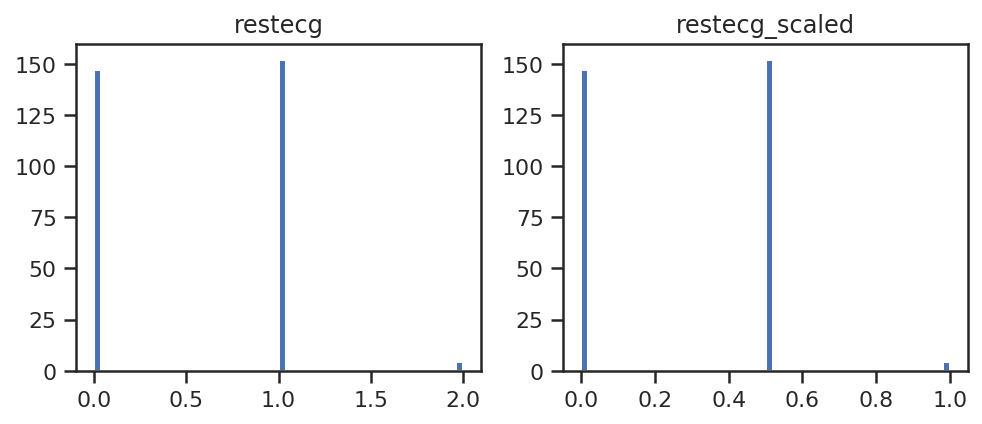

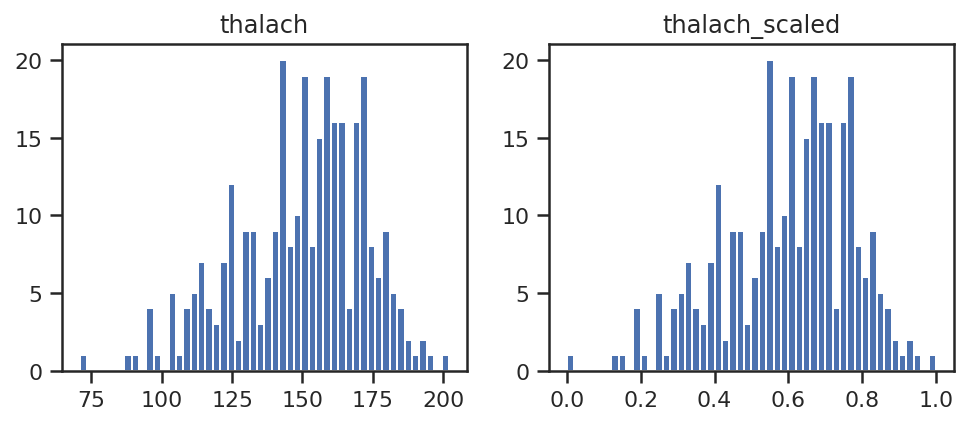

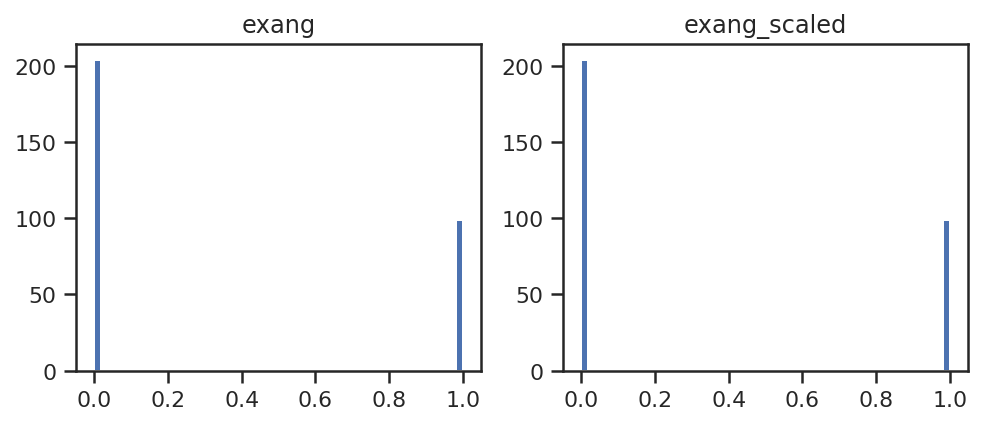

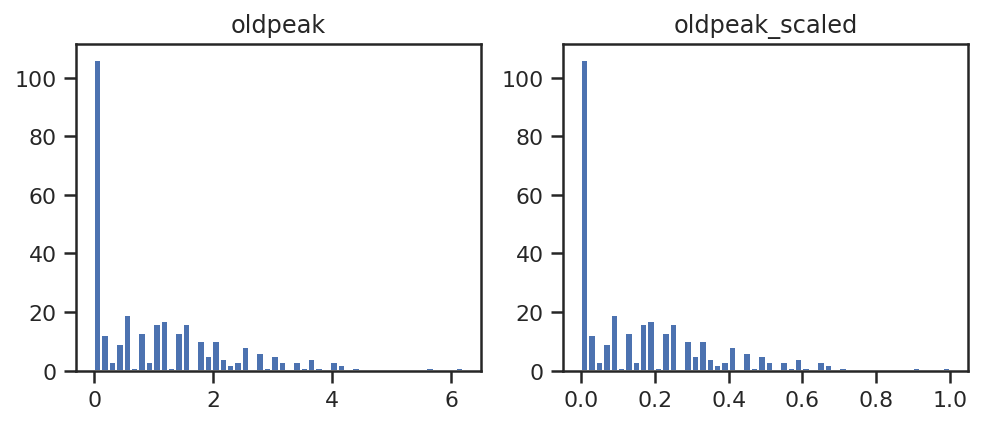

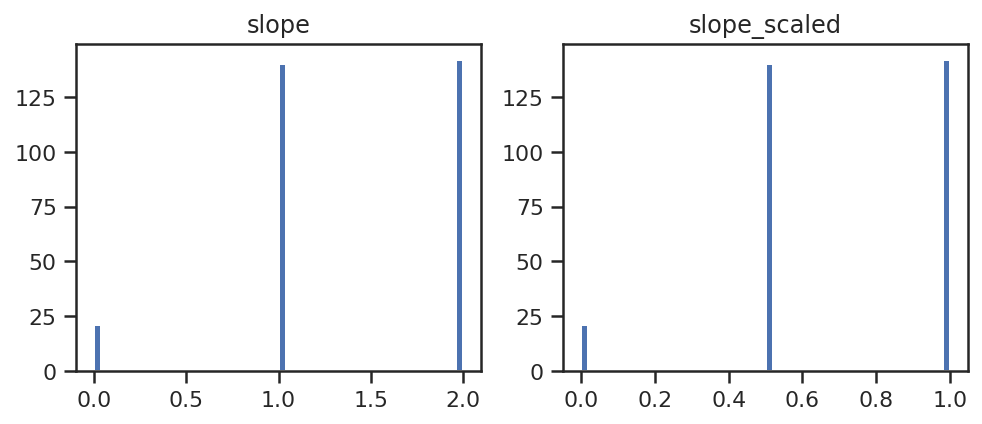

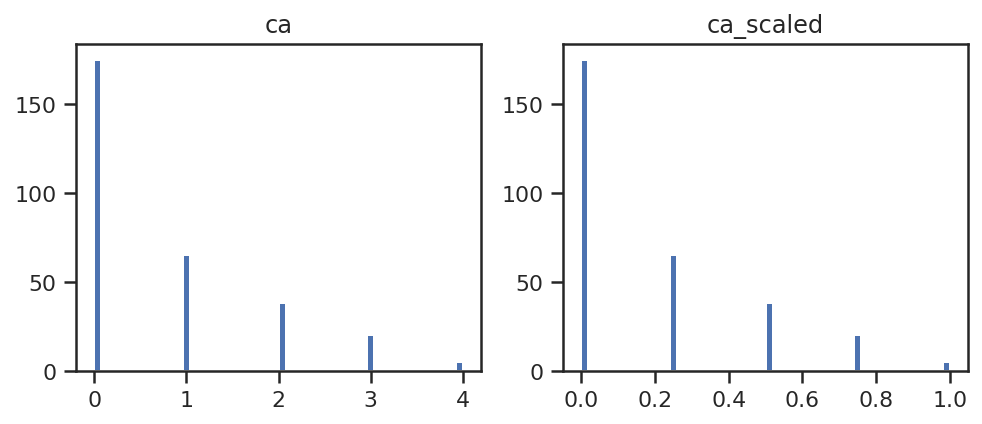

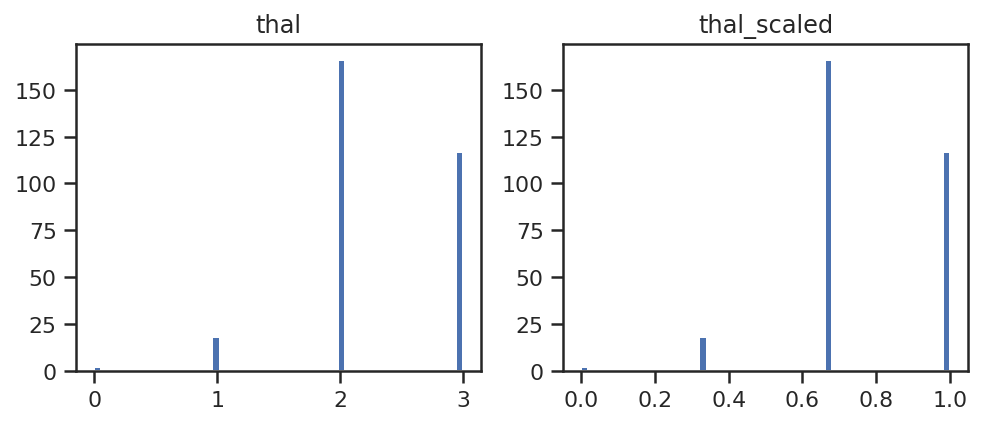

In [17]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# 4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.

In [18]:
corr_cols_1 = scale_cols + ['target']
corr_cols_1

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [19]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['target']
corr_cols_2

['age_scaled',
 'sex_scaled',
 'cp_scaled',
 'trestbps_scaled',
 'chol_scaled',
 'fbs_scaled',
 'restecg_scaled',
 'thalach_scaled',
 'exang_scaled',
 'oldpeak_scaled',
 'slope_scaled',
 'ca_scaled',
 'thal_scaled',
 'target']

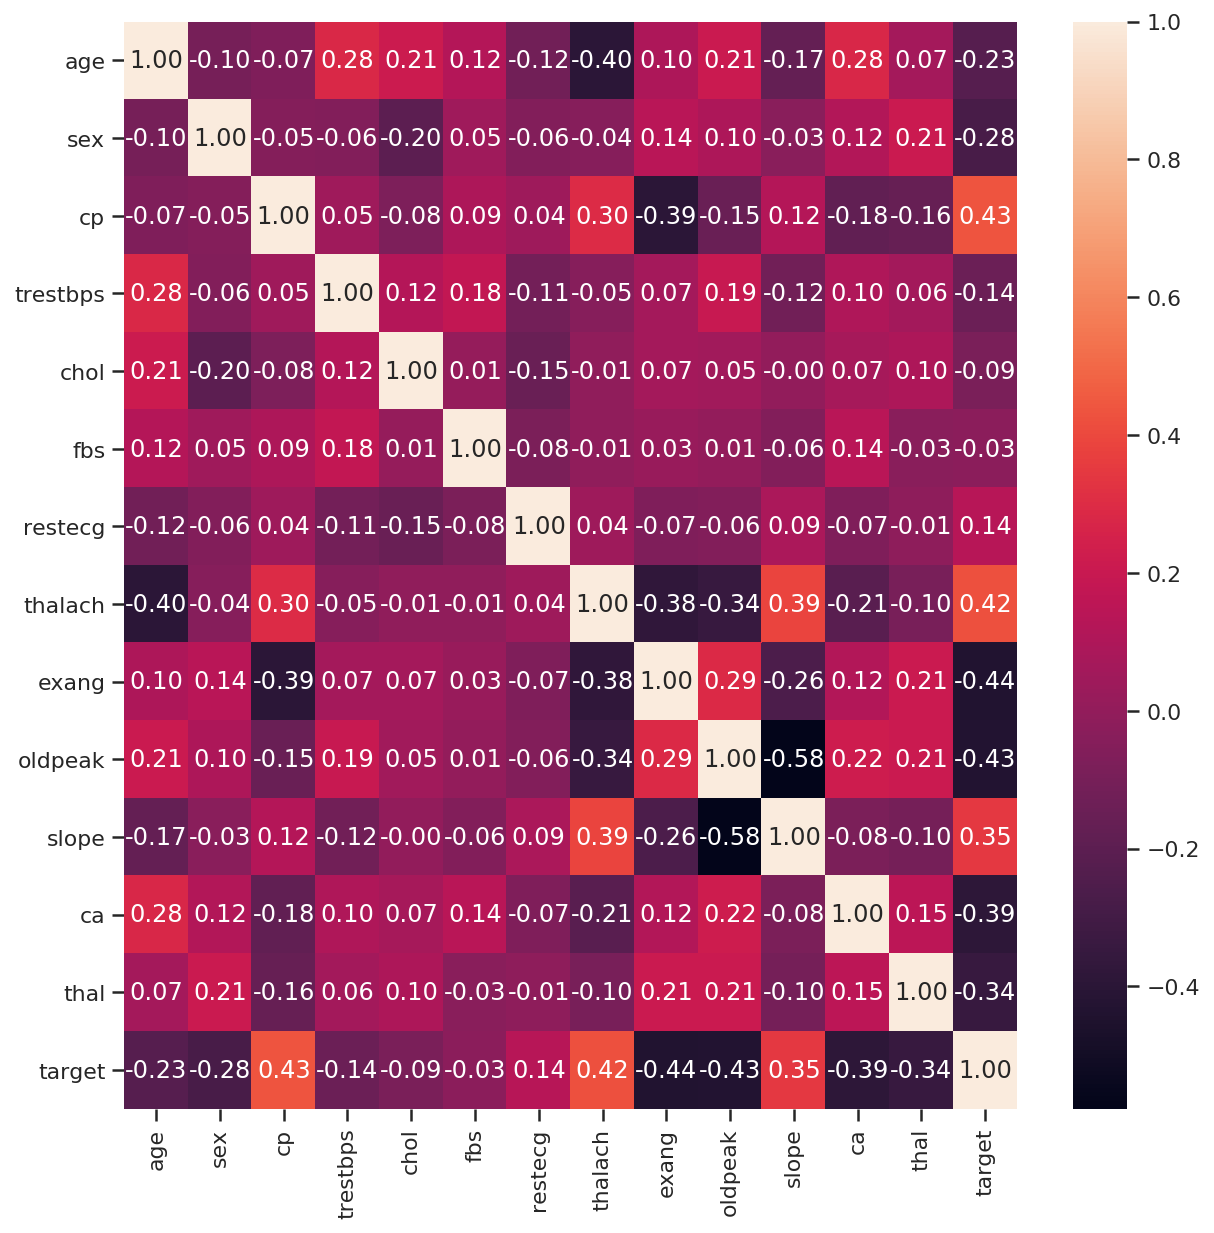

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

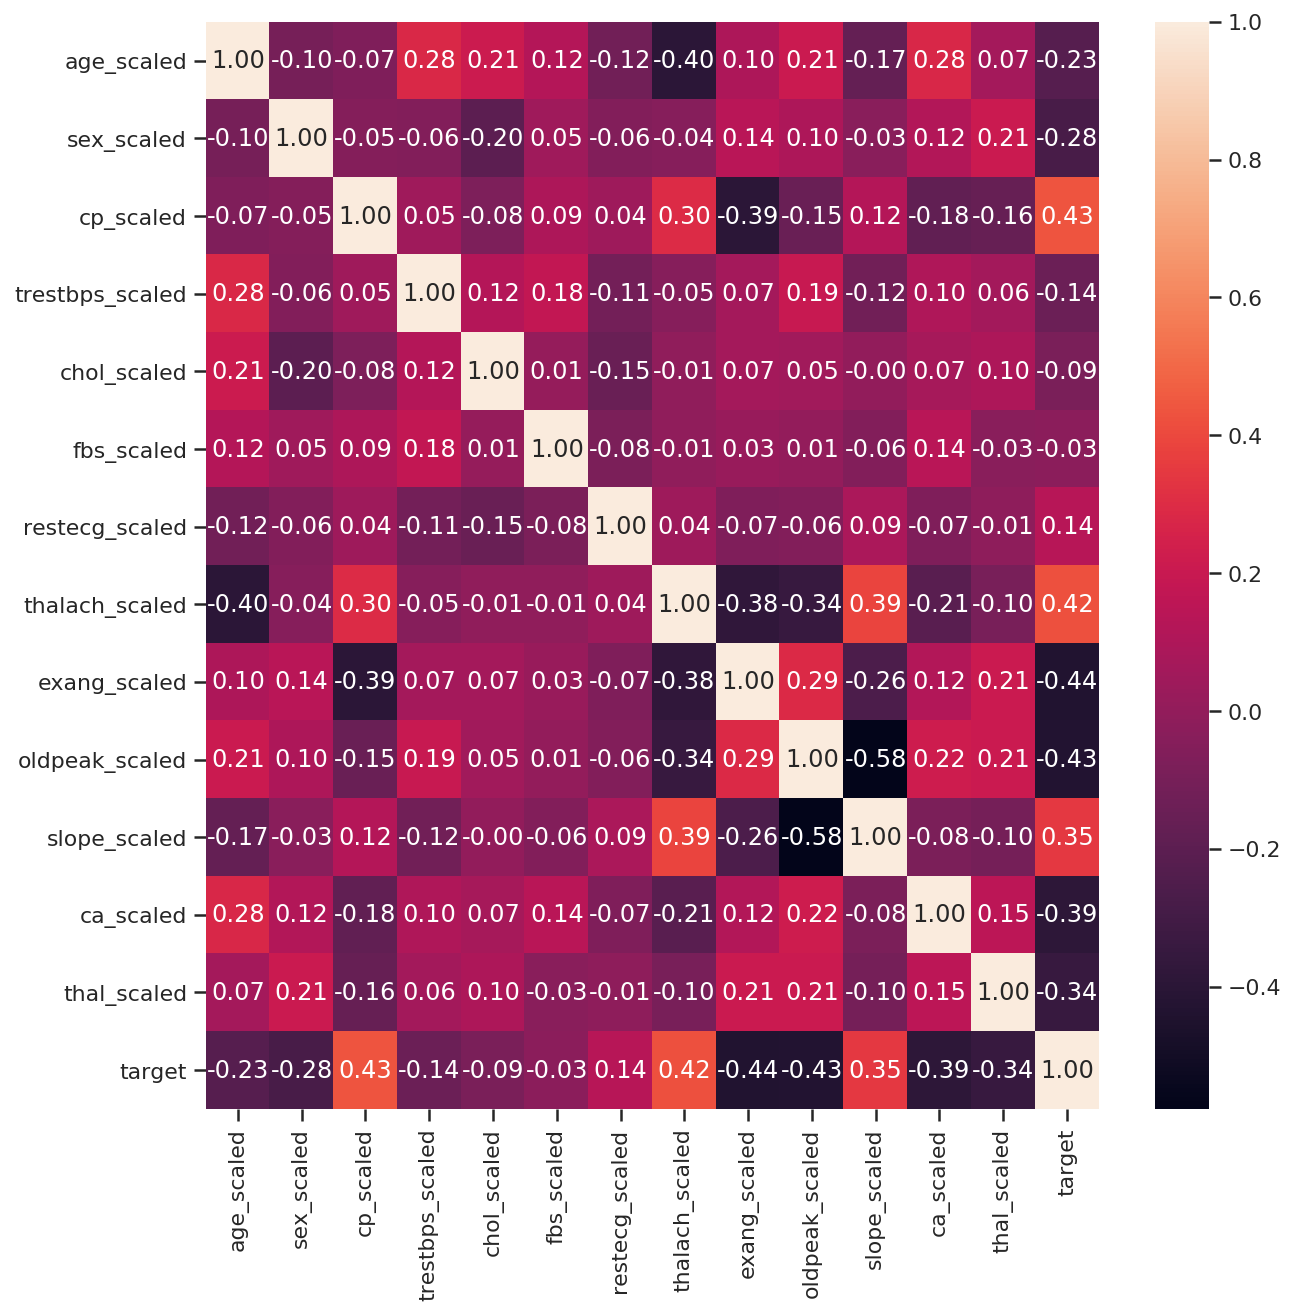

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

* Корреляционные матрицы для исходных и масштабированных данных совпадают;
* Колонку trestbps, fbs, chol можно не включать, так как имеют очень слабую корреляцию с целевым признаком;
* Видно, что в данном наборе данных небольшие по модулю значения коэффициентов корреляции, это свидетельствуют о незначительной корреляции между исходными признаками и целевым признаком, но некоторая зависимость все равно имеется, поэтму на основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

# 5) Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.

1. метрика accuracy - показывает отношения правильных предсказаний моделью ко всем;
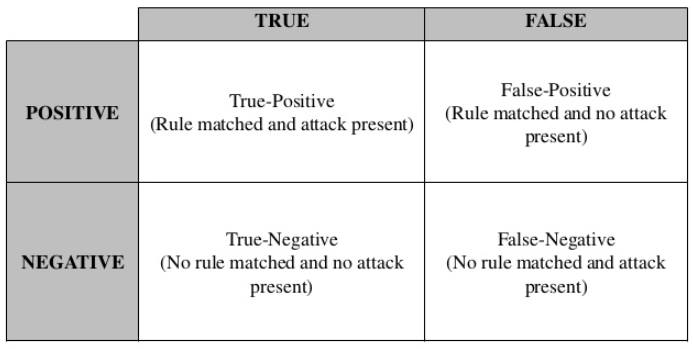
2. метрика precision - это отношение tp / (tp + fp). Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.
3. метрика recall - это отношение tp / (tp + fn). Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.
4. Метрика ROC AUC.
Основана на вычислении следующих характеристик:
    * tp / (tp + fn) - откладывается по оси ординат. Совпадает с recall;
    * fp / (fp + tn) - откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.
Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика
Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.
В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

In [22]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [23]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

# 6) Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.

Для задачи классификации будем использовать следующие модели:
1. Метод ближайших соседей (KNN);
2. Машина опорных векторов (SVM);
3. Решающее дерево (Desicion Tree);
4. Случайный лес (Random Forest);
5. Градиентный бустинг (Gradient Boosting).

# 7) Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [24]:
# Признаки для задачи классификации
class_cols = ['age_scaled', 'sex_scaled', 'cp_scaled', 'restecg_scaled', 'thalach_scaled', 'exang_scaled',
              'oldpeak_scaled', 'slope_scaled', 'ca_scaled', 'thal_scaled']

In [25]:
X = data[class_cols]
y = data['target']
X.shape

(303, 10)

Разделим выборку на обучающую и тестовую

In [26]:
# С использованием метода train_test_split разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (227, 10)
X_test: (76, 10)
y_train: (227,)
y_test: (76,)


# 8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [27]:
# Модели
models = {'KNN_3':KNeighborsClassifier(n_neighbors=3),
          'SVC':SVC(),
          'Tree':DecisionTreeClassifier(),
          'RF':RandomForestClassifier(),
          'GB':GradientBoostingClassifier()}

In [28]:
# Сохранение метрик
metricLogger = MetricLogger()

In [29]:
def test_model(model_name, model, metricLogger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metricLogger.add('precision', model_name, precision)
    metricLogger.add('recall', model_name, recall)
    metricLogger.add('accuracy', model_name, accuracy)
    metricLogger.add('roc_auc', model_name, roc_auc)
    
    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(y_test, y_pred)
    
    plot_confusion_matrix(model, X_test, y_test, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
*****************************************************


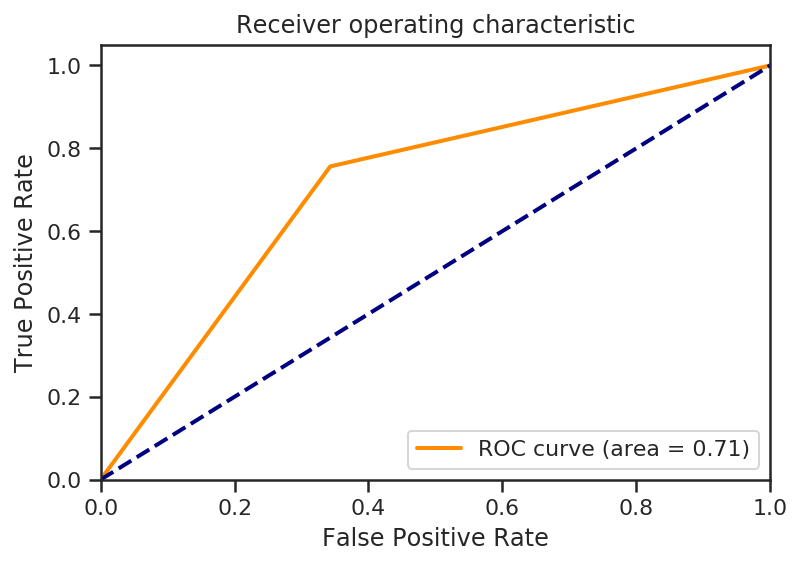

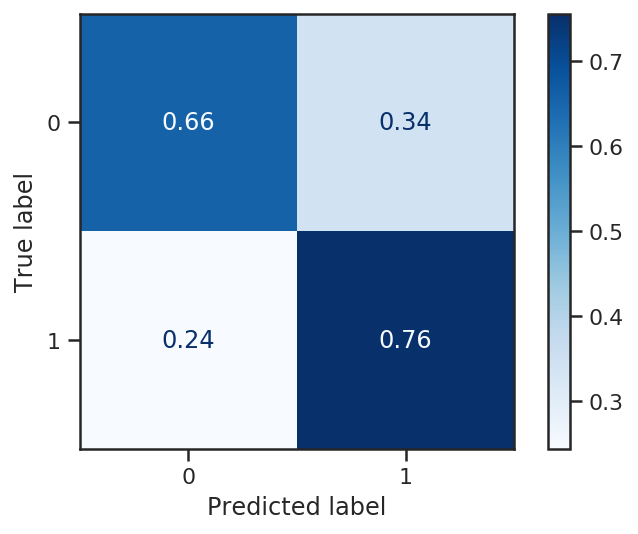

*****************************************************
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
*****************************************************


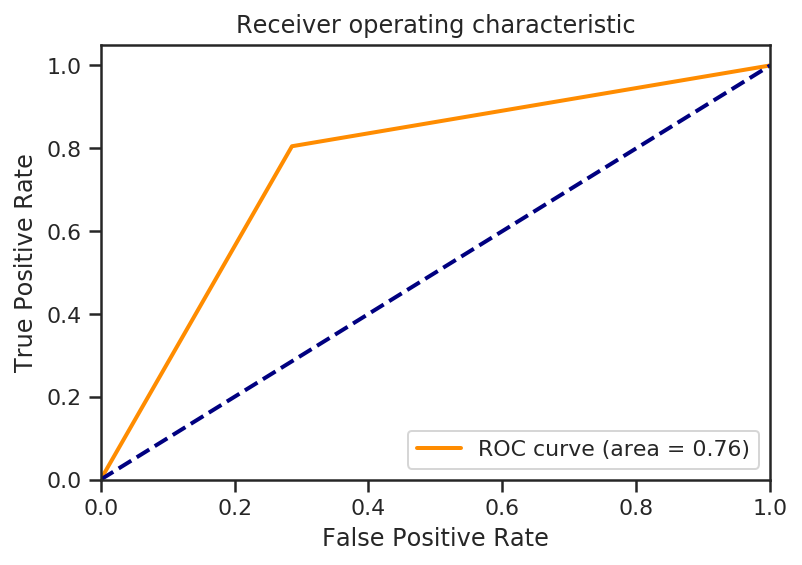

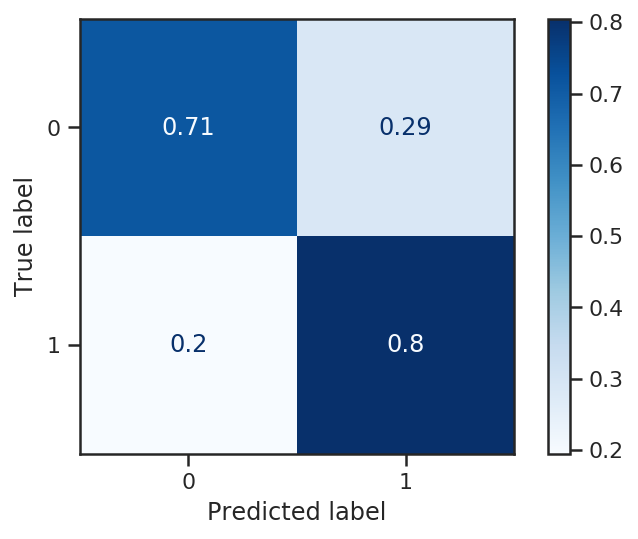

*****************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
*****************************************************


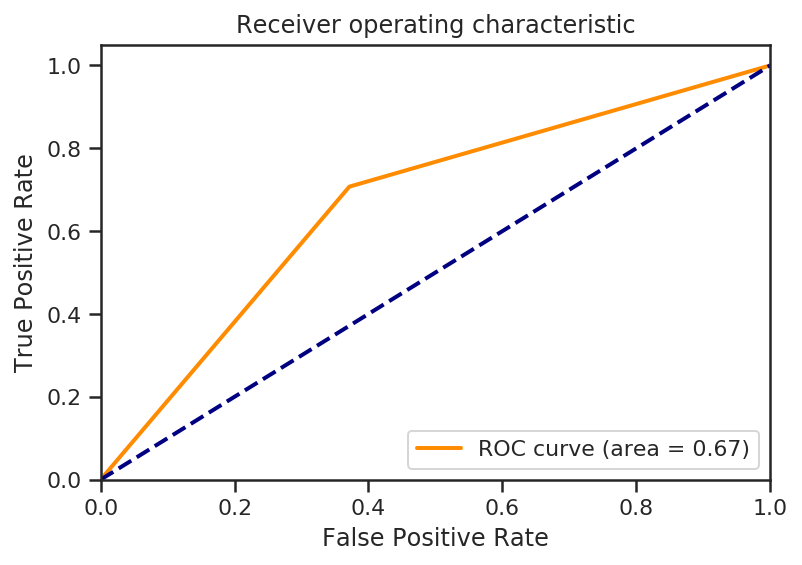

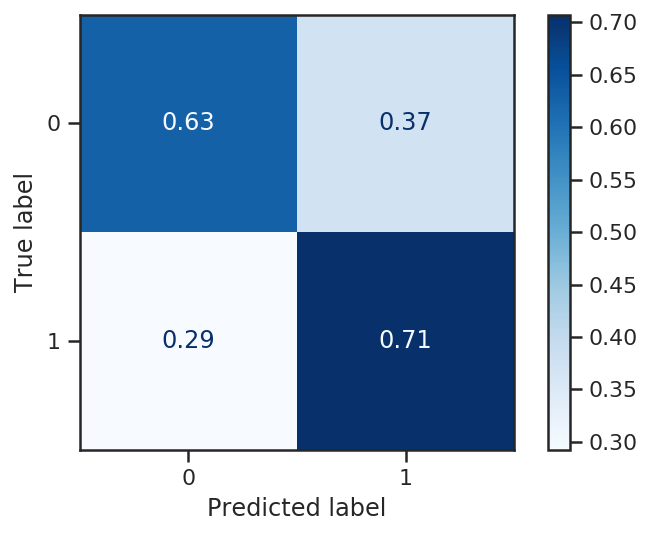

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
*****************************************************


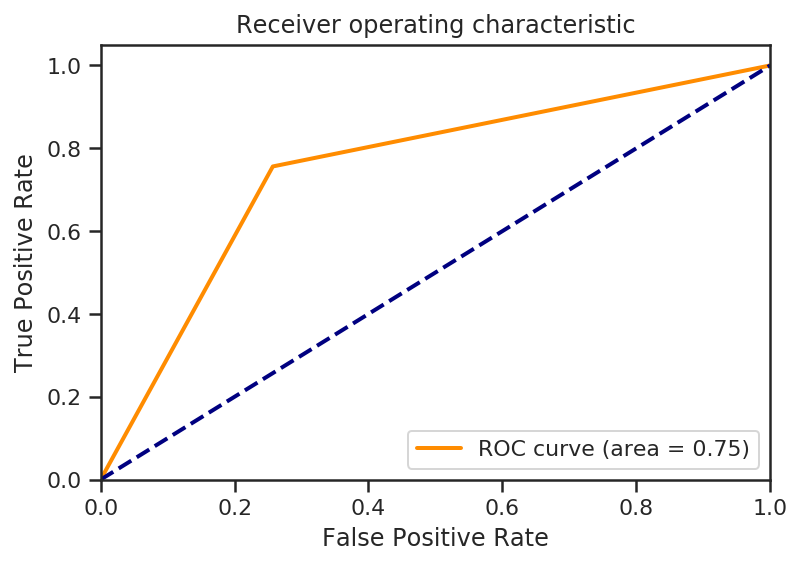

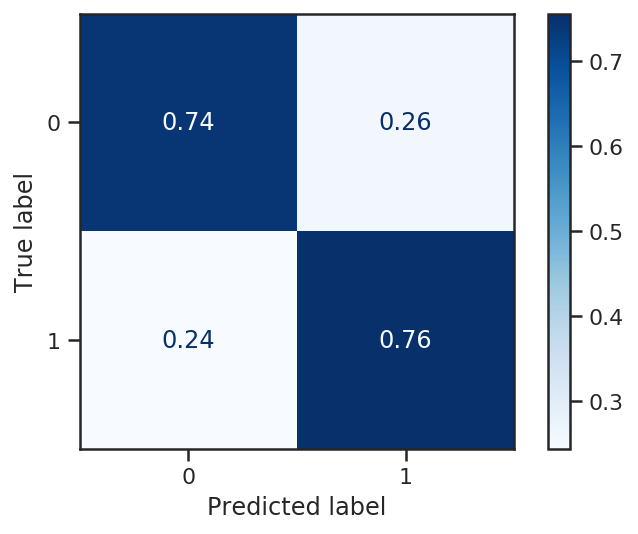

*****************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
*****************************************************


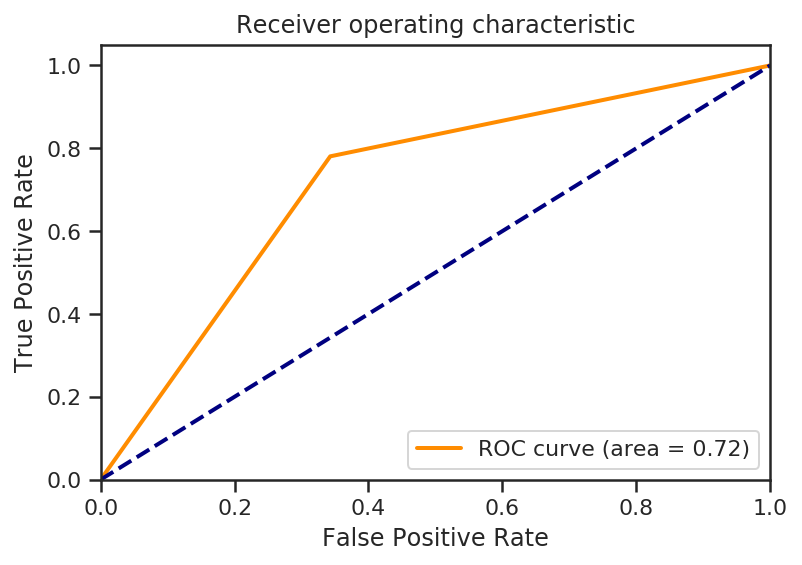

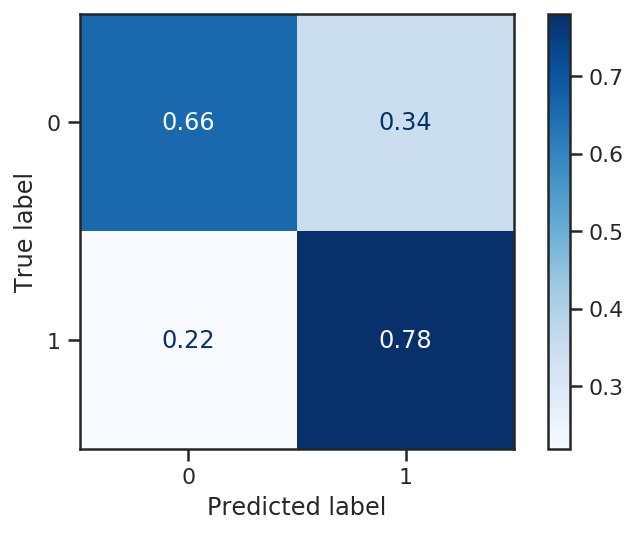

In [30]:
for model_name, model in models.items():
    test_model(model_name, model, metricLogger)

# 9) Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [31]:
n_range = np.array(range(0,30,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}]

In [32]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy', n_jobs = -1)
clf_gs.fit(X, y)

CPU times: user 399 ms, sys: 103 ms, total: 502 ms
Wall time: 1.82 s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [33]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 5}

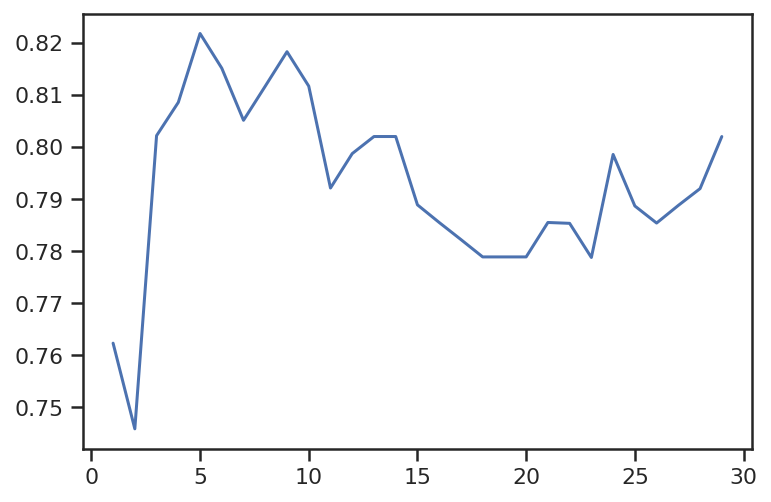

In [35]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

# 10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
*****************************************************


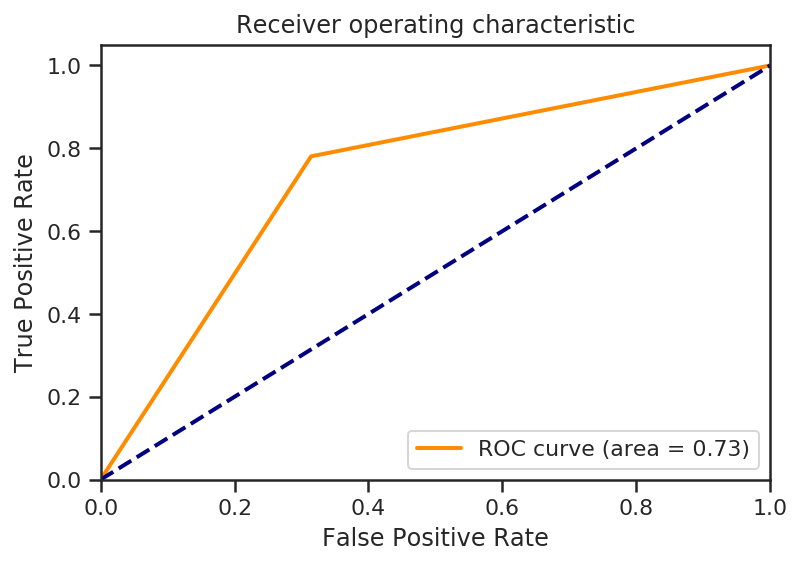

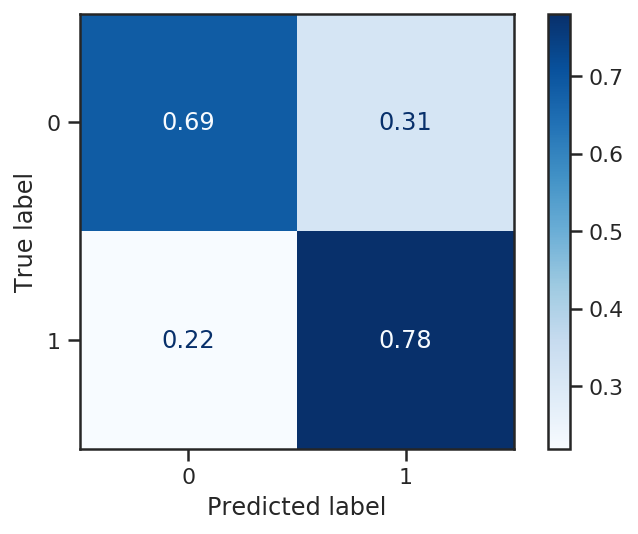

In [36]:
test_model('KNN_5', KNeighborsClassifier(n_neighbors=5), metricLogger)

# 11) Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [37]:
# Метрики качества модели
metrics = metricLogger.df['metric'].unique()
metrics

array(['precision', 'recall', 'accuracy', 'roc_auc'], dtype=object)

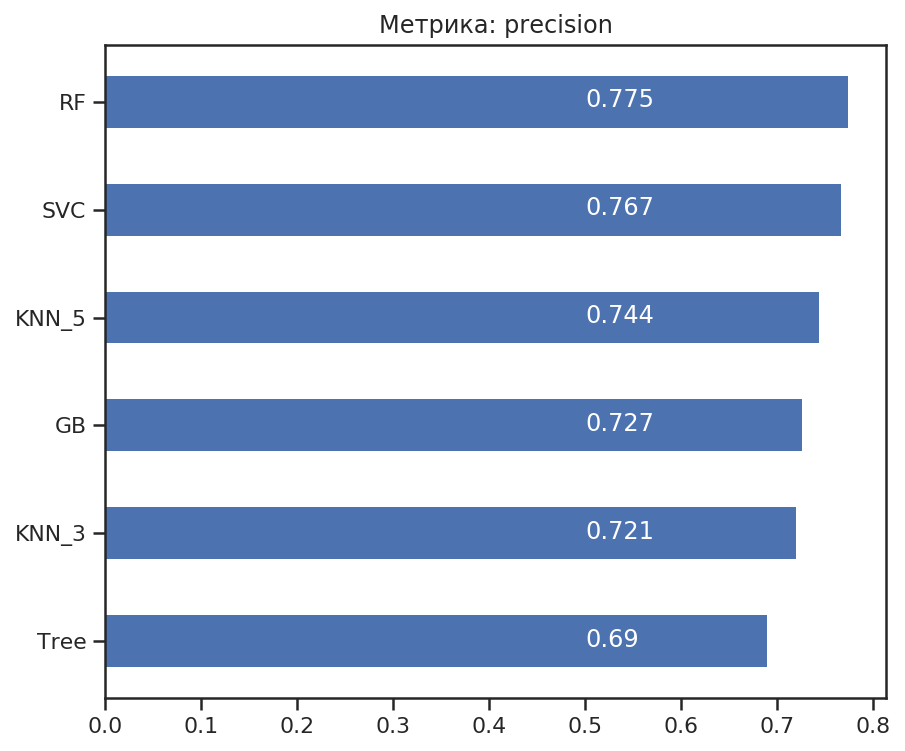

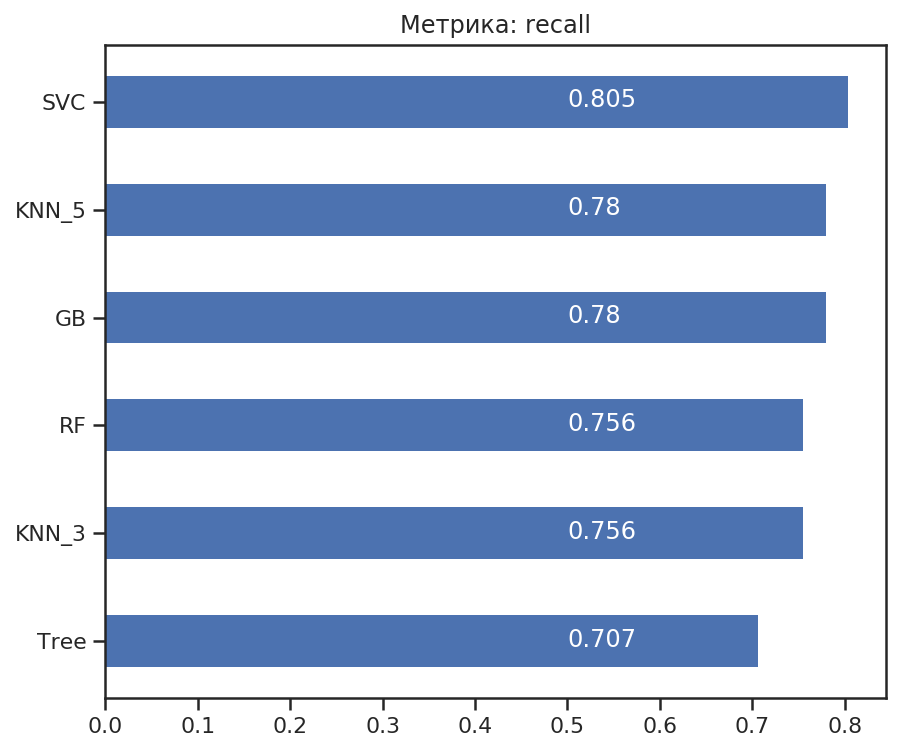

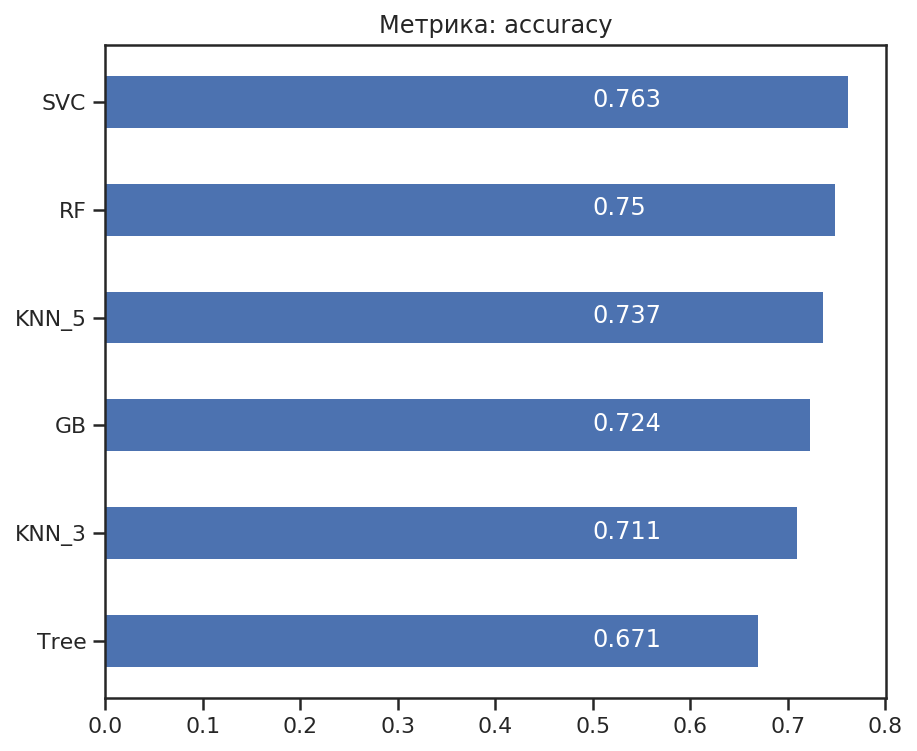

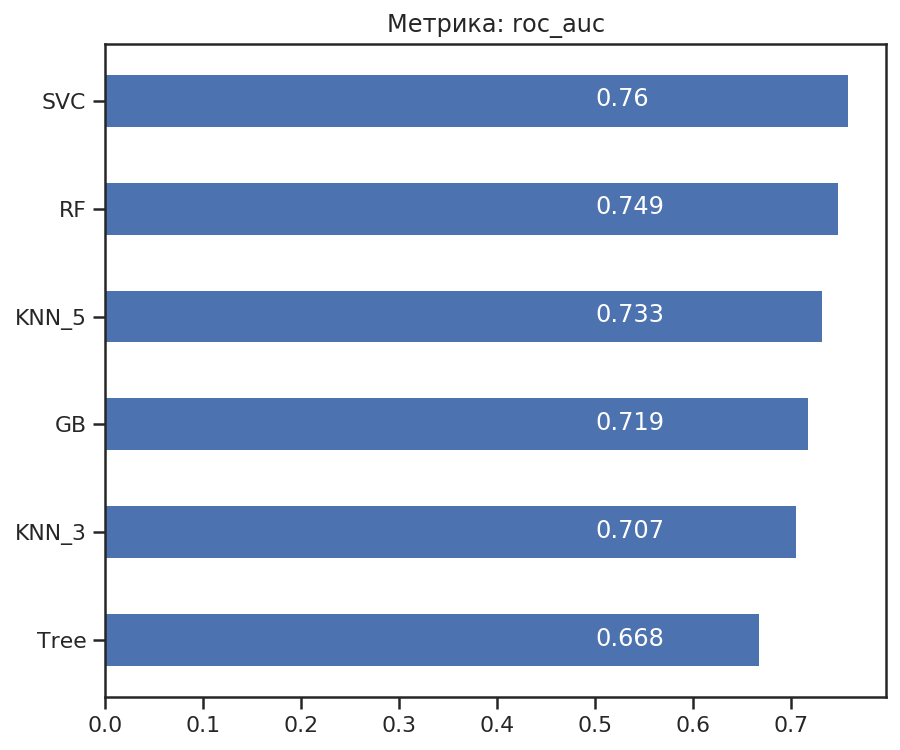

In [38]:
# Построим графики метрик качества модели
for metric in metrics:
    metricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

#### Вывод: на основании трех метрик из четырех используемых, лучшей оказалась модель SVC - метод опорных векторов. Случайный лес в четвертой метрике precision совсем немного выиграл у SVM.